In [152]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## 1

In [153]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## 2

In [154]:
commits = pd.io.sql.read_sql(
    """
    SELECT uid, timestamp
    FROM checker
    WHERE uid LIKE "user_%";
    """,
    con=conn,
    parse_dates=['timestamp']
)

In [155]:
for_hours = (
    commits.copy()
    .rename(columns={'timestamp': 'hour'})
)
for_hours['hour'] = for_hours['hour'].apply(lambda x: x.hour)
for_hours = for_hours.groupby(by=['uid', 'hour'])['uid'].count().unstack()
for_hours = for_hours.fillna(0)
for_hours['total_commits'] = for_hours.sum(axis=1)
for_hours = (
    for_hours.sort_values(by=['total_commits'], ascending=False)
    .drop(columns=['total_commits'])
)

In [156]:
def get_day(x):
    if x == 1: return 'Sun'
    elif x == 2: return 'Mon'
    elif x == 3: return 'Tue'
    elif x == 4: return 'Wed'
    elif x == 5: return 'Thu'
    elif x == 6: return 'Fri'
    else: return 'Sat'

for_days = (
    commits.copy()
    .rename(columns={'timestamp': 'day_of_week'})
)

for_days['day_of_week'] = (
    for_days['day_of_week'].dt.weekday
    .apply(get_day)
)
for_days = for_days.groupby(by=['uid', 'day_of_week'])['uid'].count().unstack()
for_days = for_days.fillna(0)
for_days['total_commits'] = for_days.sum(axis=1)
for_days = (
    for_days.sort_values(by=['total_commits'], ascending=False)
    .drop(columns=['total_commits'])
)
for_days = for_days[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

[Text(0, 0, '0'),
 Text(0, 1, '1'),
 Text(0, 2, '3'),
 Text(0, 3, '5'),
 Text(0, 4, '6'),
 Text(0, 5, '7'),
 Text(0, 6, '8'),
 Text(0, 7, '9'),
 Text(0, 8, '10'),
 Text(0, 9, '11'),
 Text(0, 10, '12'),
 Text(0, 11, '13'),
 Text(0, 12, '14'),
 Text(0, 13, '15'),
 Text(0, 14, '16'),
 Text(0, 15, '17'),
 Text(0, 16, '18'),
 Text(0, 17, '19'),
 Text(0, 18, '20'),
 Text(0, 19, '21'),
 Text(0, 20, '22'),
 Text(0, 21, '23')]

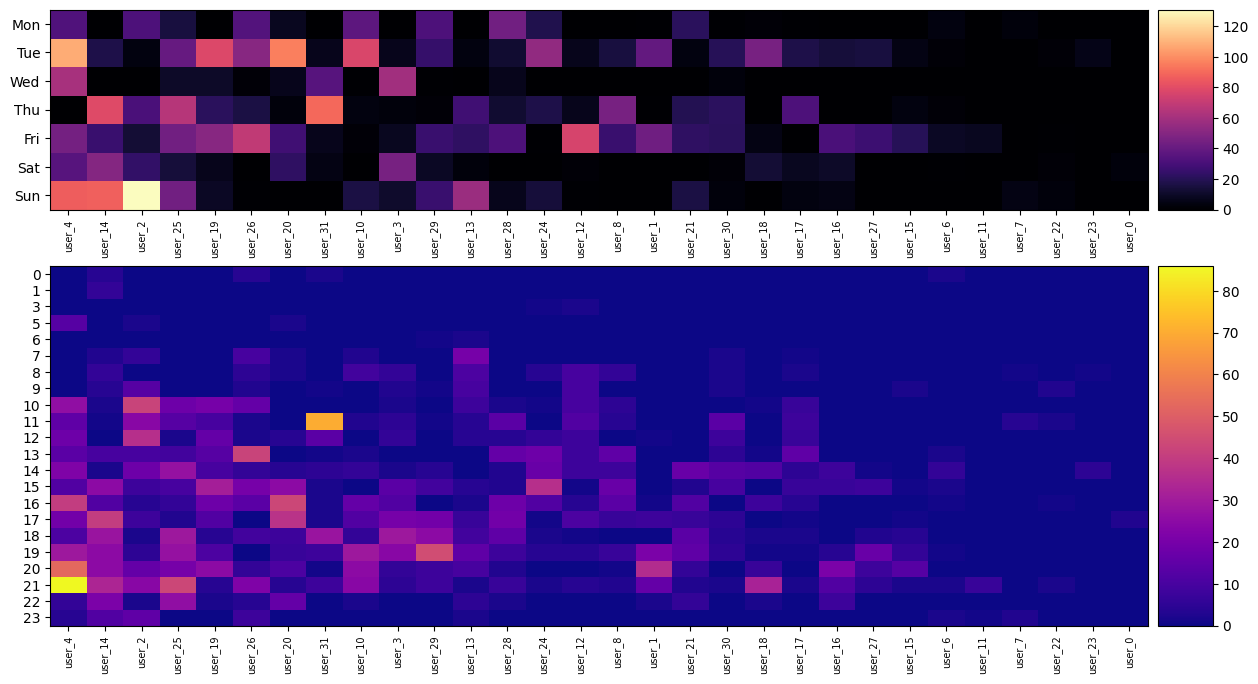

In [157]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8),  gridspec_kw={'height_ratios': [5, 9]})

user_data = for_days.index.tolist()

days_data = for_days.T.values
days_labels = for_days.columns.tolist()
im1 = ax1.imshow(days_data, cmap='magma', aspect='auto', interpolation='nearest')
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
cbar1 = fig.colorbar(im1, cax=cax1)
ax1.set_xticks([i for i in range(len(user_data))])
ax1.set_yticks([i for i in range(len(days_labels))])
ax1.set_xticklabels(user_data, rotation=90, fontsize=7)
ax1.set_yticklabels(days_labels)


hours_data = for_hours.T.values
hours_labels = for_hours.columns.tolist()
im2 = ax2.imshow(hours_data, cmap='plasma', aspect='auto', interpolation='nearest')
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)
cbar2 = fig.colorbar(im2, cax=cax2)
ax2.set_xticks([i for i in range(len(user_data))])
ax2.set_yticks([i for i in range(len(hours_labels))])
ax2.set_xticklabels(user_data, rotation=90, fontsize=7)
ax2.set_yticklabels(hours_labels)

## 3

In [158]:
conn.close()

## 4

Which user has the most commits on Tuesday? - user_4

Which user has the most commits on Thursday? user_21

On which weekday do users not like to make a lot of commits? - Sunday

Which user made the largest number of commits at which hour? - user_4, 21